In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
data_test = pd.read_csv("/content/sample_data/california_housing_test.csv")
data_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
x_train = data_train[["longitude", "latitude", "housing_median_age", "median_income"]]
y_train= data_train["median_house_value"]

x_test = data_test[["longitude", "latitude", "housing_median_age", "median_income"]]
y_test= data_test["median_house_value"]

In [ ]:
valoresMaxDepth = [None, 5, 10, 15, 20, 25]

Mejor modelo:
DecisionTreeRegressor(max_depth=10, random_state=10)
Mejor profundidad: 10
Error cuadrático medio en el conjunto de entrenamiento: 2147542219.6573377
Error cuadrático medio en el conjunto de prueba: 3664823535.111488


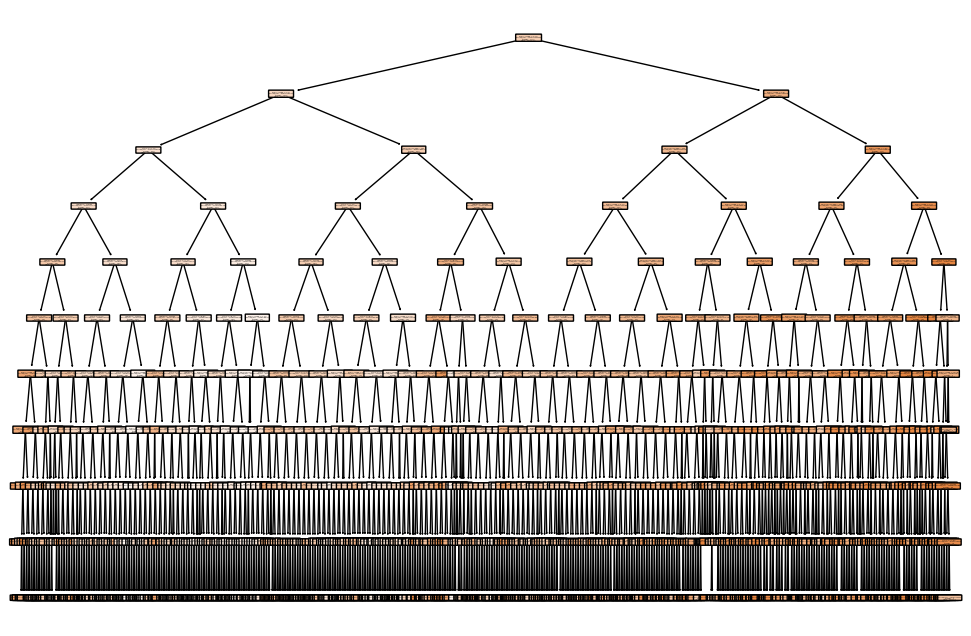

In [ ]:
best_model = None
best_depth = None
best_train_score = 0
best_test_score = 0

for max_depth in valoresMaxDepth:

    model = DecisionTreeRegressor(max_depth=max_depth, random_state=10)

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_score = mean_squared_error(y_train, y_train_pred)
    test_score = mean_squared_error(y_test, y_test_pred)

    if best_test_score == 0 or test_score < best_test_score:
        best_model = model
        best_depth = max_depth
        best_train_score = train_score
        best_test_score = test_score

print("Mejor modelo:")
print(best_model)
print("Mejor profundidad:", best_depth)
print("Error cuadrático medio en el conjunto de entrenamiento:", best_train_score)
print("Error cuadrático medio en el conjunto de prueba:", best_test_score)


plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=x_train.columns, filled=True, rounded=True, max_depth=best_depth)
plt.show()